In [63]:
import pandas as pd
import numpy as np

In [64]:
data = pd.read_csv("../dataset/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../년도별 주식데이터/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../년도별 주식데이터/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../년도별 주식데이터/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../년도별 주식데이터/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../년도별 주식데이터/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../년도별 주식데이터/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../년도별 주식데이터/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../년도별 주식데이터/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../년도별 주식데이터/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../년도별 주식데이터/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../년도별 주식데이터/코스닥주가.csv", encoding='cp949')

In [65]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [66]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [67]:
# 수익성 범주인 총자본사업이익률과 1주당매출액의 4분위수에 공통적으로 있는 기업들 추출
data_logit=data_logit[(data_logit["[제조]순운전자본회전률"]>=data_logit["[제조]순운전자본회전률"].quantile(.75)) & (data_logit["[제조]비유동자산회전률"]>=data_logit["[제조]비유동자산회전률"].quantile(.75))
                                                                                            & (data_logit["[제조]매출채권회전률"]>=data_logit["[제조]매출채권회전률"].quantile(.75))]
# 상관계수가 높았던 총자본사업이익률 기준으로 추출
data_logit =data_logit.sort_values("[제조]순운전자본회전률", ascending=False)
data_logit

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
10644,흥구석유(주),24060,2013-04-01,19941207,NaN,도매 및 상품 중개업,5,-4.74,-0.28,16570.27,4.22,29.12,11.55,11.87,4314.71,66.30,-1.98
10643,흥구석유(주),24060,2012-04-01,19941207,NaN,도매 및 상품 중개업,5,-1.14,1.01,18191.50,4.60,25.31,10.79,8.52,4282.74,56.34,4.66
10645,흥구석유(주),24060,2014-04-01,19941207,NaN,도매 및 상품 중개업,5,-2.83,1.75,12881.44,3.46,31.39,10.54,217.08,4411.09,52.78,64.35
10642,흥구석유(주),24060,2011-04-01,19941207,NaN,도매 및 상품 중개업,5,-1.97,3.82,17427.11,4.37,24.77,9.70,10.82,4223.00,49.64,10.35
7690,고려신용정보(주),49720,2011-04-01,20020131,NaN,사업지원 서비스업,5,8.19,17.56,5637.03,8.72,26.25,5.33,11.13,172.57,64.92,207.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,(주)빅솔론,93190,2011-04-01,20070820,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,16.71,17.38,7772.73,4.42,13.35,1.30,27.94,1194.16,43.55,41.86
5775,(주)케이씨씨건설,21320,2019-04-01,20010821,NaN,종합 건설업,5,7.27,6.60,76753.08,6.79,12.95,1.30,60.03,352.84,68.25,9.70
1191,(주)루멘스,38060,2016-04-01,20060808,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,2.91,1.82,8520.90,2.86,13.20,1.30,61.29,917.66,71.75,3.90
1190,(주)루멘스,38060,2015-04-01,20060808,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,-3.54,2.10,9002.65,3.39,9.68,1.30,65.77,937.31,70.36,6.33


In [68]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


<ipython-input-68-3ce73cae502e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2012["투자일자"] = "2012-04-02"
<ipython-input-68-3ce73cae502e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2017["투자일자"] = "2017-04-03"
<ipython-input-68-3ce73cae502e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [69]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [70]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [71]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [72]:
data_logit_2011

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
10642,흥구석유(주),24060,2011-04-01,19941207,NaN,도매 및 상품 중개업,5,-1.97,3.82,17427.11,4.37,24.77,9.70,10.82,4223.00,49.64,10.3500
7690,고려신용정보(주),49720,2011-04-01,20020131,NaN,사업지원 서비스업,5,8.19,17.56,5637.03,8.72,26.25,5.33,11.13,172.57,64.92,207.9500
8042,도이치모터스(주),67990,2011-04-01,20041203,NaN,기타 기계 및 장비 제조업,5,65.91,5.74,17027.02,7.99,164.69,3.80,38.83,300.09,58.69,2.7600
3515,(주)에이디칩스,54630,2011-04-01,20011113,NaN,도매 및 상품 중개업,6,9.78,3.89,7876.77,7.58,16.81,3.76,90.51,312.76,77.41,40.0000
7066,(주)피씨디렉트,51380,2011-04-01,20020215,NaN,도매 및 상품 중개업,5,3.77,10.11,45991.02,78.60,22.53,3.59,59.12,883.04,54.95,39.0500
8791,씨제이프레시웨이(주),51500,2011-04-01,20010726,NaN,도매 및 상품 중개업,5,32.54,7.01,148404.55,11.68,12.34,3.42,3.10,948.26,63.78,9.1300
9314,예스이십사(주),53280,2011-04-01,20080507,NaN,소매업; 자동차 제외,5,4.58,5.46,20656.20,5.46,31.46,3.08,25.45,641.77,69.75,241.5400
8983,에스씨아이평가정보(주),36120,2011-04-01,19991207,NaN,사업지원 서비스업,5,-10.89,-17.36,1149.22,3.97,25.01,3.01,131.38,69.45,0.00,778.6875
7119,(주)피제이메탈,128660,2011-04-01,20101213,NaN,1차 금속 제조업,5,29.74,12.80,6313.76,7.04,14.15,2.99,2.65,197.78,37.48,10.8500
10435,한국컴퓨터(주),54040,2011-04-01,20020115,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,0.65,7.11,20761.16,11.38,10.55,2.93,59.25,816.52,53.12,315.6800


In [73]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [74]:
stock_2011

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
0,53134,(주)CMG제약,58820,2011-04-01,1710,-0.001168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54907,(주)CMG제약,58820,2011-04-04,1708,-0.001170,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55794,(주)CMG제약,58820,2011-04-05,1732,0.014052,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56489,(주)CMG제약,58820,2011-04-06,1732,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57415,(주)CMG제약,58820,2011-04-07,1735,0.001732,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232119,280536,흥구석유(주),24060,2012-03-26,1745,0.002874,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232120,281614,흥구석유(주),24060,2012-03-27,1720,-0.014327,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232121,282512,흥구석유(주),24060,2012-03-28,1720,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232122,284240,흥구석유(주),24060,2012-03-29,1735,0.008721,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [76]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j-1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j-1]:
                    list[i].loc[j-1,"trade"] = "sell"
                if j== list[i].tail(n=1).index:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [77]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [78]:
stock_2011[stock_2011["trade"]=="sell"]

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
18311,284433,(주)디아이디,74130,2012-03-30,3360,-0.005917,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
18561,284374,(주)디아크,78590,2012-03-30,906,-0.003300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
61639,284560,(주)아이에스이커머스,69920,2012-03-30,1200,-0.008264,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
63139,284953,(주)아이즈비전,31310,2012-03-30,1760,0.011494,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
70139,284766,(주)에스에이엠티,31330,2012-03-30,1167,-0.023431,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
74821,285027,(주)에이디칩스,54630,2012-03-30,1525,0.007931,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
83124,284950,(주)엘앤에프,66970,2012-03-30,8345,0.018926,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
88874,284864,(주)오텍,67170,2012-03-30,10000,0.019368,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
103328,284553,(주)이라이콤,41520,2012-03-30,17400,0.023529,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
141069,284829,(주)토비스,51360,2012-03-30,6470,0.050325,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell


In [79]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [80]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [81]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,1.147987,1.011480
1,2011-04-05,1.287117,1.012871
2,2011-04-06,0.019460,1.000195
3,2011-04-07,0.089461,1.000895
4,2011-04-08,1.344443,1.013444
...,...,...,...
2448,2021-03-25,0.438442,1.004384
2449,2021-03-26,0.457220,1.004572
2450,2021-03-29,-0.427725,0.995723
2451,2021-03-30,1.219815,1.012198


In [82]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [83]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [84]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [85]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [86]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [87]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [88]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [89]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [90]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,1.147987,1.011480,1.011480,1.011480,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,1.287117,1.012871,1.024499,1.024499,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,0.019460,1.000195,1.024698,1.024698,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,0.089461,1.000895,1.025615,1.025615,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,1.344443,1.013444,1.039404,1.039404,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.438442,1.004384,11.013708,2.078199,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,0.457220,1.004572,11.064065,2.087701,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,-0.427725,0.995723,11.016741,2.078771,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,1.219815,1.012198,11.151125,2.104129,10.0,958.06,388660278311558,0.415051,0.004349


In [91]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,1.147987,1.011480,1.011480,1.011480,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,1.287117,1.012871,1.024499,1.024499,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,0.019460,1.000195,1.024698,1.024698,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,0.089461,1.000895,1.025615,1.025615,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,1.344443,1.013444,1.039404,1.039404,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.438442,1.004384,11.013708,2.078199,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,0.457220,1.004572,11.064065,2.087701,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,-0.427725,0.995723,11.016741,2.078771,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,1.219815,1.012198,11.151125,2.104129,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [92]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,1.147987,1.011480,1.011480,1.011480,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,1.287117,1.012871,1.024499,1.024499,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,0.019460,1.000195,1.024698,1.024698,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,0.089461,1.000895,1.025615,1.025615,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,1.344443,1.013444,1.039404,1.039404,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.438442,1.004384,11.013708,2.078199,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,0.457220,1.004572,11.064065,2.087701,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,-0.427725,0.995723,11.016741,2.078771,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,1.219815,1.012198,11.151125,2.104129,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [93]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [94]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [95]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
0,2011-04-04,1.147987,1.011480,1.011480,1.011480,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338,1.005338
1,2011-04-05,1.287117,1.012871,1.024499,1.024499,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525,1.010525
2,2011-04-06,0.019460,1.000195,1.024698,1.024698,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609,1.003609
3,2011-04-07,0.089461,1.000895,1.025615,1.025615,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469,1.005469
4,2011-04-08,1.344443,1.013444,1.039404,1.039404,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.438442,1.004384,11.013708,2.078199,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700,1.730556
2449,2021-03-26,0.457220,1.004572,11.064065,2.087701,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883,1.733655
2450,2021-03-29,-0.427725,0.995723,11.016741,2.078771,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043,1.728943
2451,2021-03-30,1.219815,1.012198,11.151125,2.104129,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415,1.736119


In [96]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [97]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [98]:
stock_rtn_all.to_csv('./dataset/활동성범주.csv', encoding='CP949',index=False)

In [99]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,1.147987,1.147987,1.147987,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,1.287117,2.449880,2.449880,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,0.019460,2.469817,2.469817,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,0.089461,2.561487,2.561487,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,1.344443,3.940368,3.940368,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.438442,1001.370760,107.819913,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,0.457220,1006.406452,108.770108,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,-0.427725,1001.674079,107.877147,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,1.219815,1015.112468,110.412864,958.06,0.415051,78.341459,73.611916,10.0


In [100]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )

Sharpe ratio: 0.05


In [101]:
Sharpe *np.sqrt(252)

0.835342386141565

In [102]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.9308421210247781

In [103]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)


0         1.389666
1         9.374097
2         9.462782
3         9.862435
4        14.697427
           ...    
2448     99.553565
2449     99.653690
2450     99.559609
2451     99.825734
2452    100.227771
Name: 누적수익률(%), Length: 2453, dtype: float64


In [104]:
Std

1.4619891083805285

In [105]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [106]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [107]:
rtn_2011

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,1.147987,1.147987,1.147987,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,1.287117,2.449880,2.449880,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,0.019460,2.469817,2.469817,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.089461,2.561487,2.561487,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,1.344443,3.940368,3.940368,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-1.297520,21.451105,21.451105,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.592470,20.731544,20.731544,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.154983,20.544431,20.544431,519.56,-0.417833,-2.349359,-2.349359,1.0


In [108]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011


-0.3707066426840031
1.7694818281749907
Sharpe ratio: 0.05
0.802329438779261


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,1.147987,1.147987,1.147987,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,1.287117,2.449880,2.449880,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,0.019460,2.469817,2.469817,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.089461,2.561487,2.561487,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,1.344443,3.940368,3.940368,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-1.297520,21.451105,21.451105,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.592470,20.731544,20.731544,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.154983,20.544431,20.544431,519.56,-0.417833,-2.349359,-2.349359,1.0


In [109]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012


-0.4240220608101826
1.156333026492379
Sharpe ratio: 0.14
2.1775195409025465


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-1.045486,20.588701,-1.045486,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-1.462311,18.825319,-2.492508,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,-0.221575,18.562032,-2.708561,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,-0.139008,18.397221,-2.843803,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-2.951846,14.902317,-5.711705,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,1.351276,88.226168,54.457498,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,1.375135,90.814531,56.581497,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,0.442268,91.658443,57.274007,548.72,-0.214584,2.688501,5.159065,2.0


In [110]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013


-0.1804612541298279
1.0651866543366735
Sharpe ratio: 0.00
0.012181517322765033


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,0.649319,92.128126,0.649319,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,-0.153341,91.833516,0.494983,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,-1.400854,89.146207,-0.912806,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,-1.546414,86.221225,-2.445103,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-2.853012,80.908311,-5.228356,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-0.459719,86.366814,-2.368834,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,0.306493,86.938016,-2.069601,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,-0.269030,86.435096,-2.333064,541.46,-0.490692,1.521912,-2.258245,3.0


In [111]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014


-0.3121987237368148
0.9409074602633939
Sharpe ratio: 0.08
1.3028682101486357


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,0.532924,87.869937,0.532924,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,0.437474,88.691820,0.972730,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,1.384855,91.304929,2.371057,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,0.789605,92.815482,3.179383,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,-0.355998,92.129063,2.812067,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,-0.275903,165.687216,42.174491,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,-0.659382,163.935322,41.237018,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,-0.806360,161.807053,40.098139,640.12,-0.375080,18.380944,16.580462,4.0


In [112]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015


-0.3343109213740302
1.3656815244166105
Sharpe ratio: 0.08
1.2596269814988335


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,0.878675,168.785739,0.878675,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,1.245289,172.132897,2.134906,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,0.182281,172.628943,2.321078,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,0.809249,174.835190,3.149110,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,0.346019,175.786171,3.506025,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,0.733416,264.706895,36.879094,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,1.070257,268.610198,38.344053,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,-0.070949,268.348672,38.245899,686.50,1.476697,27.009020,5.578026,5.0


In [113]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016


-0.22625205152998987
1.214167647072285
Sharpe ratio: 0.10
1.6113188304562682


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,0.486800,271.179711,0.486800,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,0.840642,274.300003,1.331534,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,0.735637,277.053493,2.076966,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,-0.212857,276.250910,1.859689,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,0.092827,276.600174,1.954242,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,1.122768,343.021711,19.936065,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,-0.028025,342.897552,19.902452,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,0.847752,346.652224,20.918927,613.63,0.220487,13.147688,-11.156959,6.0


In [114]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017


-0.2155696096332286
1.136036559603894
Sharpe ratio: -0.08
-1.2211348033851588


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,-0.562506,343.171665,-0.562506,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,0.107199,343.646741,-0.455910,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,-0.138445,343.032532,-0.593724,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,1.783515,350.934084,1.179202,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-3.015001,337.338418,-1.871352,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,2.050806,399.761989,12.135057,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,0.742639,403.473414,12.967815,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-1.366735,396.592265,11.423844,850.97,-0.916352,54.604205,35.392668,7.0


In [115]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2018


-0.3025740232591959
1.6349220836246952
Sharpe ratio: 0.08
1.2756556374344743


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2018-04-03,0.324512,403.611198,0.324512,872.32,0.520857,59.083913,0.520857,8.0
2018-04-04,-2.168816,392.688800,-1.851342,862.51,-1.124587,57.294876,-0.609587,8.0
2018-04-05,0.575776,395.525583,-1.286226,868.93,0.744339,58.465683,0.130214,8.0
2018-04-06,-1.098301,390.083222,-2.370400,867.96,-0.111632,58.288785,0.018437,8.0
2018-04-09,-0.915961,385.594249,-3.264649,874.44,0.746578,59.470535,0.765153,8.0
...,...,...,...,...,...,...,...,...
2019-03-25,-1.547702,473.353465,14.217886,727.21,-2.252779,32.620383,-16.200737,8.0
2019-03-26,0.858244,478.274239,15.198155,736.81,1.320114,34.371123,-15.094492,8.0
2019-03-27,-0.719149,474.115584,14.369708,728.45,-1.134621,32.846520,-16.057847,8.0


In [116]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019


-0.4236320560388112
2.254870611888355
Sharpe ratio: 0.03
0.5427286438709107


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,0.740192,478.461083,0.740192,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,1.228450,485.567186,1.977735,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,0.220859,486.860461,2.202961,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,0.155373,487.772285,2.361757,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,0.029123,487.943462,2.391568,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,6.653271,386.876755,-15.209408,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,0.990532,391.699423,-14.369530,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,0.394189,393.637649,-14.031984,522.83,1.204003,-5.622691,-29.041408,9.0


In [117]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020


-0.507259109681727
1.5613285088500573
Sharpe ratio: 0.06
0.8935874363817401


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,5.595205,459.616590,5.595205,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,1.737317,469.338905,7.429728,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,4.619832,495.641405,12.392801,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,2.689601,511.661782,15.415719,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,0.461883,514.486941,15.948804,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,0.438442,1001.370760,107.819913,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,0.457220,1006.406452,108.770108,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,-0.427725,1001.674079,107.877147,954.10,-0.271768,77.604311,72.894317,10.0


In [118]:
stcok_rtn_2019=stock_rtn_all[stock_rtn_all["투자연차"]!=10]
stcok_rtn_2019

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,1.147987,1.147987,1.147987,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,1.287117,2.449880,2.449880,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,0.019460,2.469817,2.469817,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.089461,2.561487,2.561487,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,1.344443,3.940368,3.940368,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2020-03-25,6.653271,386.876755,-15.209408,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,0.990532,391.699423,-14.369530,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,0.394189,393.637649,-14.031984,522.83,1.204003,-5.622691,-29.041408,9.0


In [119]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stcok_rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stcok_rtn_2019["일일수익률(%)"] - stcok_rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+stcok_rtn_2019["누적수익률(%)"].min())-(100+stcok_rtn_2019["누적수익률(%)"].max()))/(stcok_rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
cagr = (stcok_rtn_2019
        ["누적수익률(%)"]**(1/9))-1
print(cagr*100)

-0.8909369070370815
1.4489771188721288
Sharpe ratio: 0.05
0.8295252124004381
투자일자
2011-04-04     1.545260
2011-04-05    10.468463
2011-04-06    10.567992
2011-04-07    11.016625
2011-04-08    16.458381
                ...    
2020-03-25    93.868866
2020-03-26    94.135912
2020-03-27    94.242415
2020-03-30    94.877580
2020-03-31    96.156890
Name: 누적수익률(%), Length: 2208, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from c

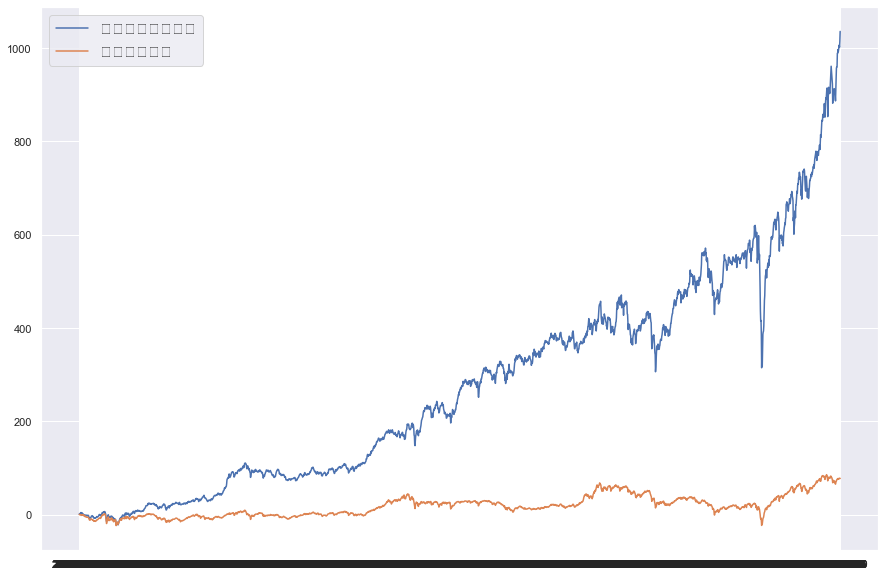

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)

plt.show()

In [121]:
stock_rtn_all.to_csv('./dataset/활동성범주.csv', encoding='CP949',index=False)